In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# Load and prepare data from Drive
df_mat = pd.read_csv("/content/drive/MyDrive/data/student/student-mat.csv", sep=";", quotechar='"')
df_por = pd.read_csv("/content/drive/MyDrive/data/student/student-por.csv", sep=";", quotechar='"')
df_mat["subject"] = "math"
df_por["subject"] = "portuguese"
df = pd.concat([df_mat, df_por], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

target = "G3"
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_processed = preprocessor.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)



--- KNN Classifier ---


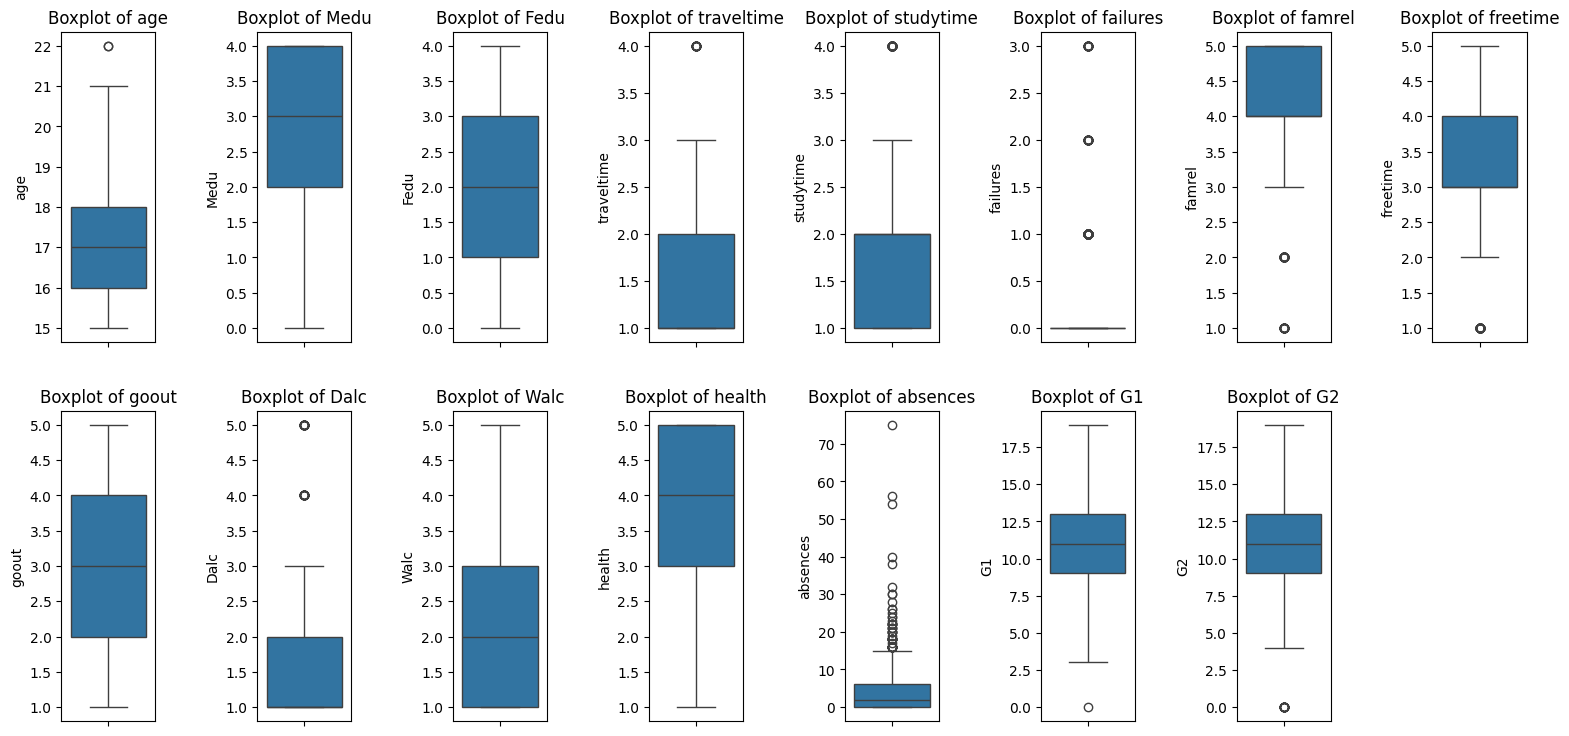

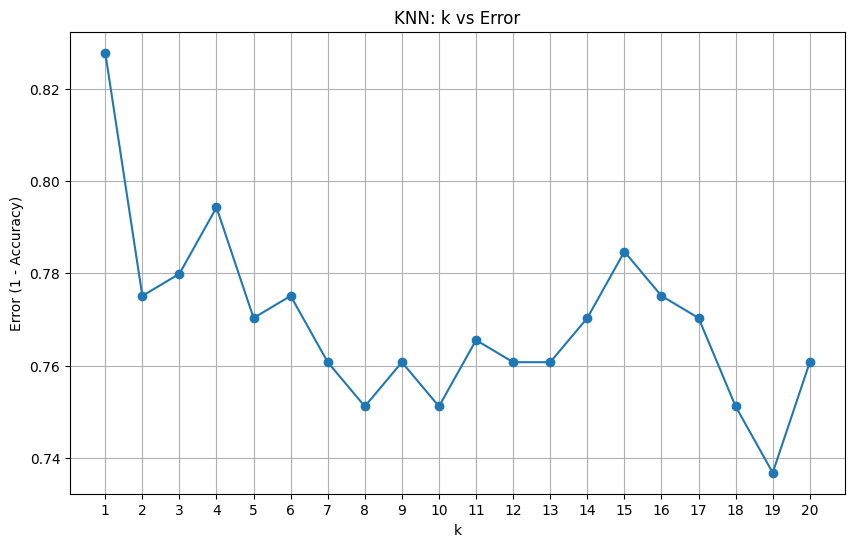

Best k (lowest error): 19 | Accuracy: 0.263
Accuracy with best k=19: 0.263


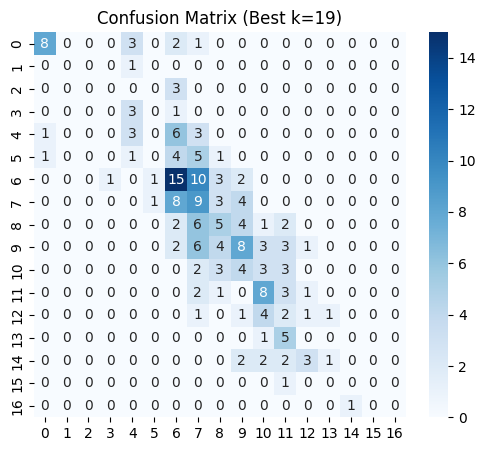

Accuracy with k=5: 0.230


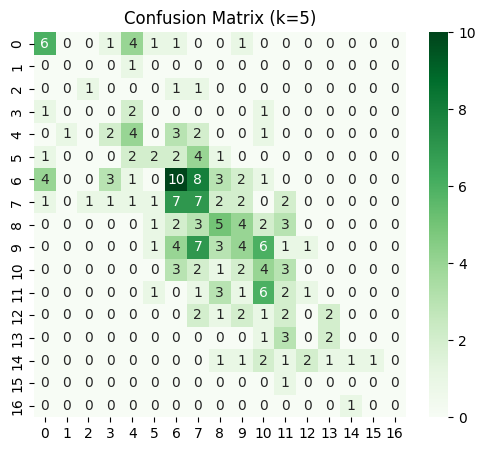

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

print("\n--- KNN Classifier ---")

# ------------------------
#  Check for outliers
# ------------------------
plt.figure(figsize=(16,8))
for i, col in enumerate(num_cols):
    plt.subplot(2, int(np.ceil(len(num_cols)/2)), i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout(pad=3.0)
plt.show()

# ------------------------
# 2️⃣ Try different k values and store errors
# ------------------------
k_values = list(range(1, 21))
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    errors.append(1 - acc)  # Error = 1 - Accuracy

# ------------------------
# 3️⃣ Plot k vs Error
# ------------------------
plt.figure(figsize=(10,6))
plt.plot(k_values, errors, marker='o')
plt.xlabel("k")
plt.ylabel("Error (1 - Accuracy)")
plt.title("KNN: k vs Error")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# ------------------------
# 4️⃣ Best k
# ------------------------
best_k = k_values[np.argmin(errors)]
print(f"Best k (lowest error): {best_k} | Accuracy: {1-min(errors):.3f}")

# Fit KNN with best k and show confusion matrix
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best k={best_k}: {acc_best:.3f}")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Best k={best_k})")
plt.show()

# ------------------------
# 5️⃣ K=5 for comparison
# ------------------------
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred_5)
print(f"Accuracy with k=5: {acc_5:.3f}")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_5), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (k=5)")
plt.show()


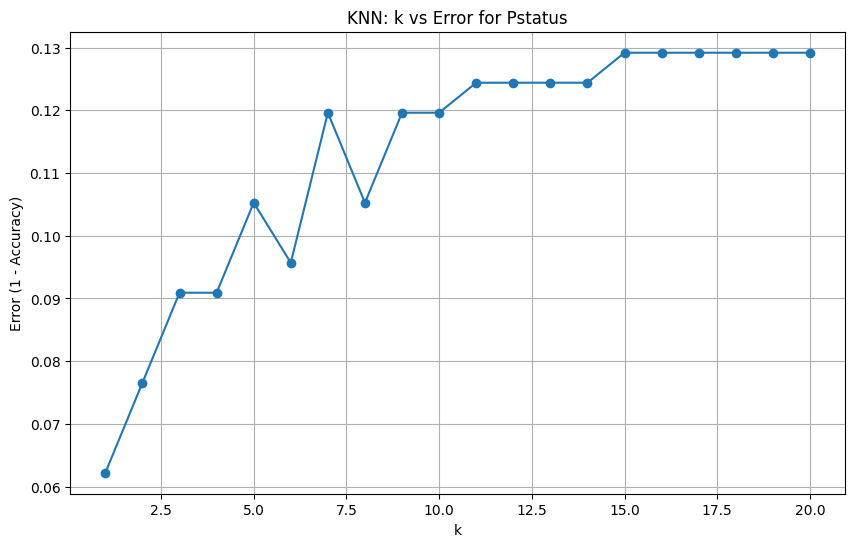

Best k (lowest error) for Pstatus: 1 | Accuracy: 0.938
Accuracy with best k=1: 0.938


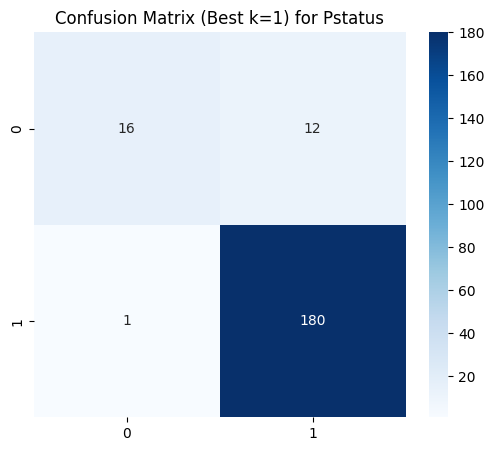

Accuracy with k=5: 0.895


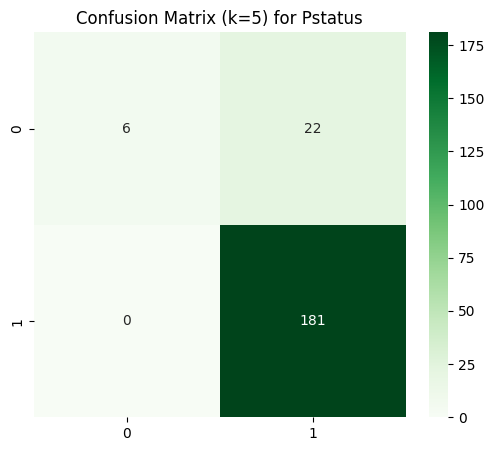

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

target_col = 'Pstatus'
y_pstatus = df[target_col]

# Train/Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_processed, y_pstatus, test_size=0.2, random_state=42
)

# Try different k values
k_values = list(range(1, 21))
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_p, y_train_p)
    y_pred = knn.predict(X_test_p)
    acc = accuracy_score(y_test_p, y_pred)
    errors.append(1 - acc)

# Plot k vs Error
plt.figure(figsize=(10,6))
plt.plot(k_values, errors, marker='o')
plt.xlabel("k")
plt.ylabel("Error (1 - Accuracy)")
plt.title(f"KNN: k vs Error for {target_col}")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmin(errors)]
print(f"Best k (lowest error) for {target_col}: {best_k} | Accuracy: {1-min(errors):.3f}")

# Fit KNN with best k and show confusion matrix
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_p, y_train_p)
y_pred_best = knn_best.predict(X_test_p)
acc_best = accuracy_score(y_test_p, y_pred_best)
print(f"Accuracy with best k={best_k}: {acc_best:.3f}")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_p, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Best k={best_k}) for {target_col}")
plt.show()

# K=5 for comparison
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_p, y_train_p)
y_pred_5 = knn_5.predict(X_test_p)
acc_5 = accuracy_score(y_test_p, y_pred_5)
print(f"Accuracy with k=5: {acc_5:.3f}")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_p, y_pred_5), annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (k=5) for {target_col}")
plt.show()



=== LINEAR REGRESSION (Detailed Analysis) ===
R² Score: 0.8518
MAE: 0.9753
MSE: 2.5876
RMSE: 1.6086


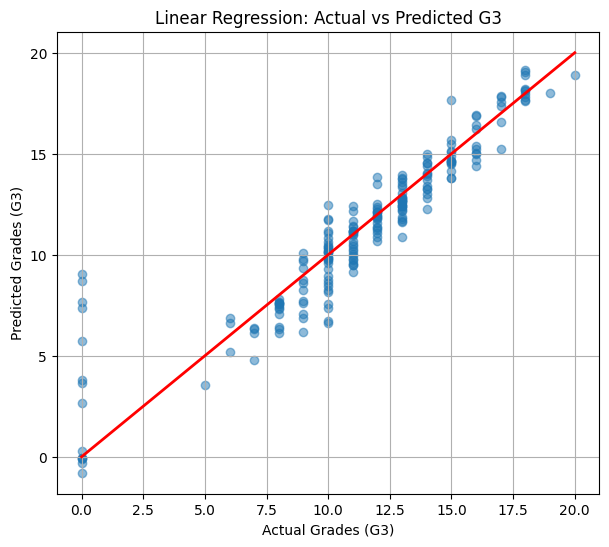

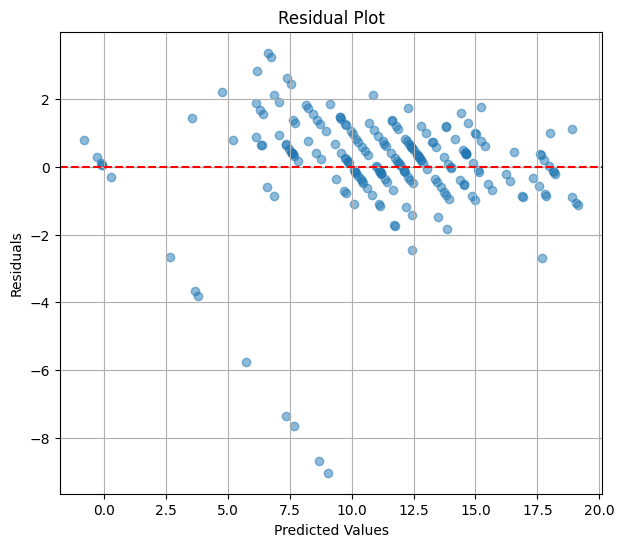

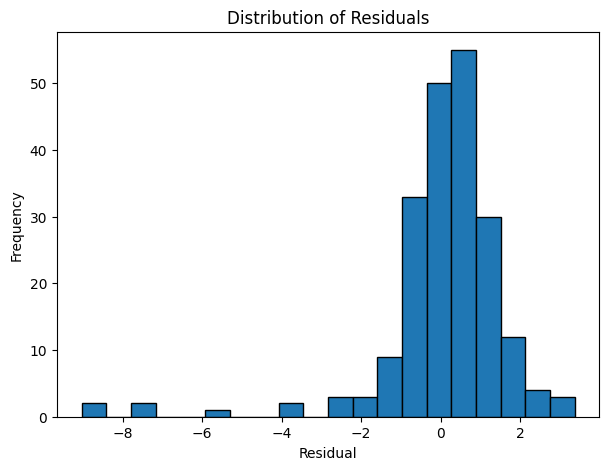


Top 15 most influential features:
                    Feature  Coefficient
14                  num__G2     3.106371
13                  num__G1     0.362281
59  cat__subject_portuguese     0.343670
58        cat__subject_math    -0.343670
31         cat__Fjob_health     0.245825
5             num__failures    -0.242424
12            num__absences     0.192215
34        cat__Fjob_teacher    -0.148349
10                num__Walc     0.144532
9                 num__Dalc    -0.143572
33       cat__Fjob_services    -0.142887
53          cat__higher_yes     0.135512
52           cat__higher_no    -0.135512
24           cat__Pstatus_T    -0.128456
23           cat__Pstatus_A     0.128456


In [ ]:
# -----------------------------
# Linear Regression (Advanced)
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n=== LINEAR REGRESSION (Detailed Analysis) ===")

# 1) Train the model
lin = LinearRegression()
lin.fit(X_train, y_train)

# 2) Predictions
y_pred = lin.predict(X_test)

# 3) Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# 4) Scatter plot (Actual vs Predicted)
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0,20],[0,20], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Linear Regression: Actual vs Predicted G3")
plt.grid(True)
plt.show()

# 5) Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# 6) Distribution of residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 7) Print model coefficients
print("\nTop 15 most influential features:")
coeffs = lin.coef_
feature_names = preprocessor.get_feature_names_out()

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coeffs})
coef_df["abs"] = np.abs(coef_df["Coefficient"])
coef_df = coef_df.sort_values(by="abs", ascending=False).head(15)
print(coef_df.drop(columns=["abs"]))



=== LOGISTIC REGRESSION (Pass/Fail Classification) ===
Accuracy: 0.9234


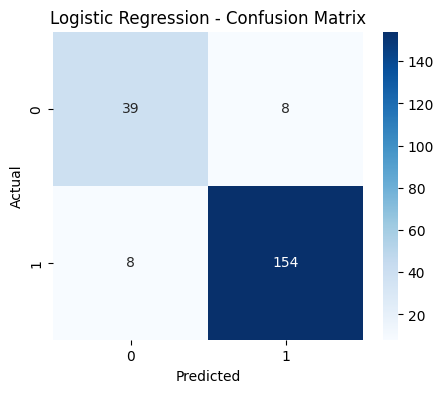


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        47
           1       0.95      0.95      0.95       162

    accuracy                           0.92       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.92      0.92      0.92       209



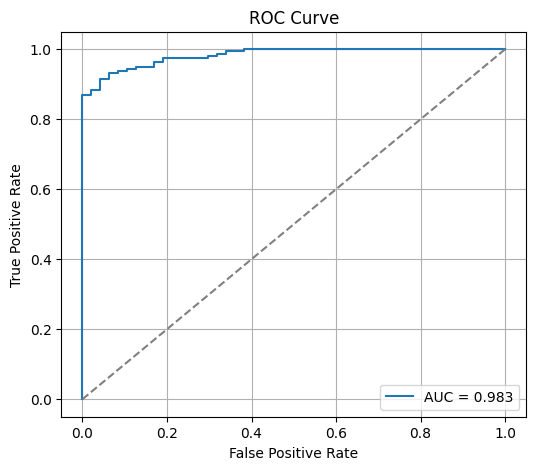

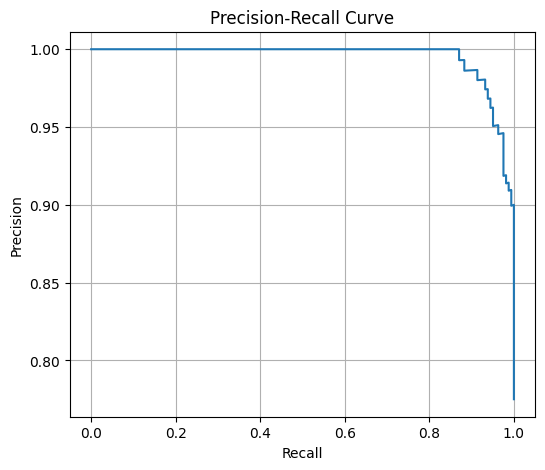


Top 20 most influential features:
                    Feature  Coefficient
14                  num__G2     4.324226
13                  num__G1     1.283383
23           cat__Pstatus_A     0.384228
59  cat__subject_portuguese     0.363608
15           cat__school_GP     0.360513
17               cat__sex_F     0.338780
10                num__Walc     0.291354
56         cat__romantic_no     0.253770
32          cat__Fjob_other     0.246390
3           num__traveltime     0.239901
53          cat__higher_yes     0.237627
37        cat__reason_other     0.203983
30        cat__Fjob_at_home     0.199384
46             cat__paid_no     0.179392
1                 num__Medu     0.165118
21         cat__famsize_GT3     0.150087
39     cat__guardian_father     0.138153
28       cat__Mjob_services     0.127820
34        cat__Fjob_teacher     0.125847
27          cat__Mjob_other     0.106000


/tmp/ipython-input-1058086037.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(20), x="Coefficient", y="Feature", palette="viridis")


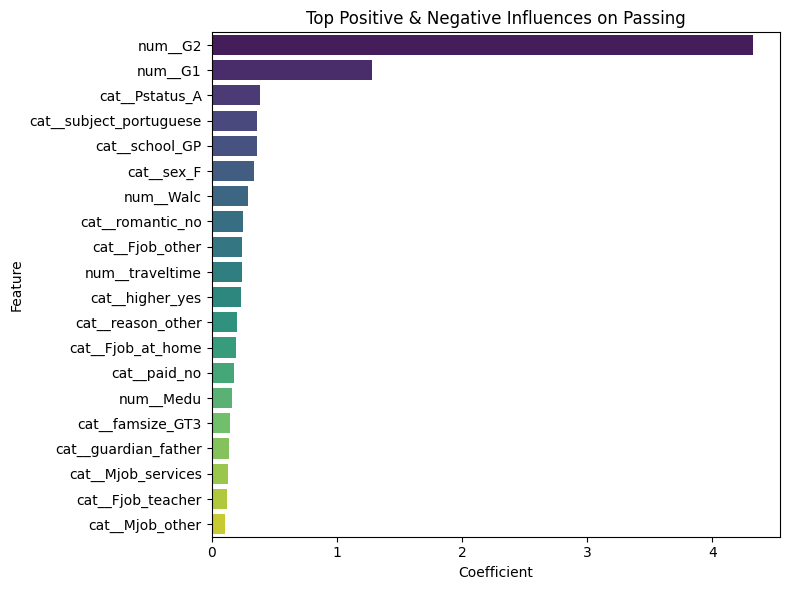

In [ ]:
# ============================================
# ========== Logistic Regression =============
# ============================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n=== LOGISTIC REGRESSION (Pass/Fail Classification) ===")

# --------------------------------------------
# 1) Convert target into binary class
# --------------------------------------------
# Pass if G3 >= 10
y_bin = (y >= 10).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_processed, y_bin, test_size=0.2, random_state=42
)

# --------------------------------------------
# 2) Train Logistic Regression
# --------------------------------------------
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_bin, y_train_bin)
y_pred_log = log_reg.predict(X_test_bin)
y_prob = log_reg.predict_proba(X_test_bin)[:, 1]

# --------------------------------------------
# 3) Accuracy Score
# --------------------------------------------
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_log):.4f}")

# --------------------------------------------
# 4) Confusion Matrix
# --------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------------------
# 5) Classification Report
# --------------------------------------------
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_log))

# --------------------------------------------
# 6) ROC Curve + AUC
# --------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# 7) Precision-Recall Curve
# --------------------------------------------
precision, recall, _ = precision_recall_curve(y_test_bin, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# --------------------------------------------
# 8) Coefficients (Feature Importance)
# --------------------------------------------
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop 20 most influential features:")
print(coef_df.head(20))

plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(20), x="Coefficient", y="Feature", palette="viridis")
plt.title("Top Positive & Negative Influences on Passing")
plt.tight_layout()
plt.show()



=== RANDOM FOREST CLASSIFIER (Detailed Analysis) ===

Accuracy: 0.9330

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        47
           1       0.95      0.96      0.96       162

    accuracy                           0.93       209
   macro avg       0.91      0.90      0.90       209
weighted avg       0.93      0.93      0.93       209



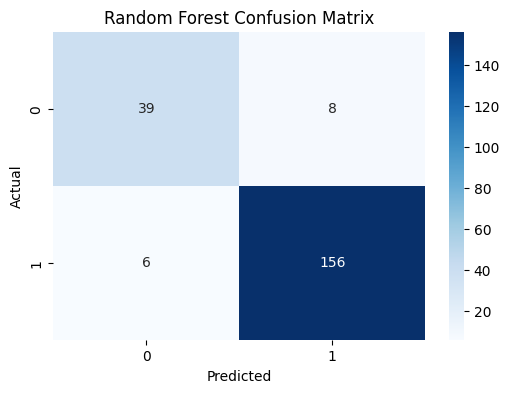

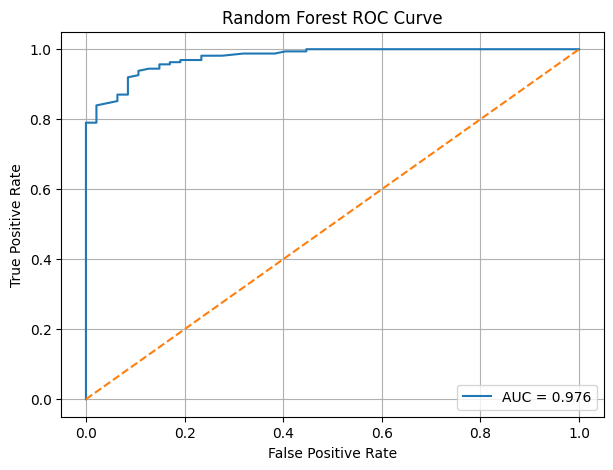

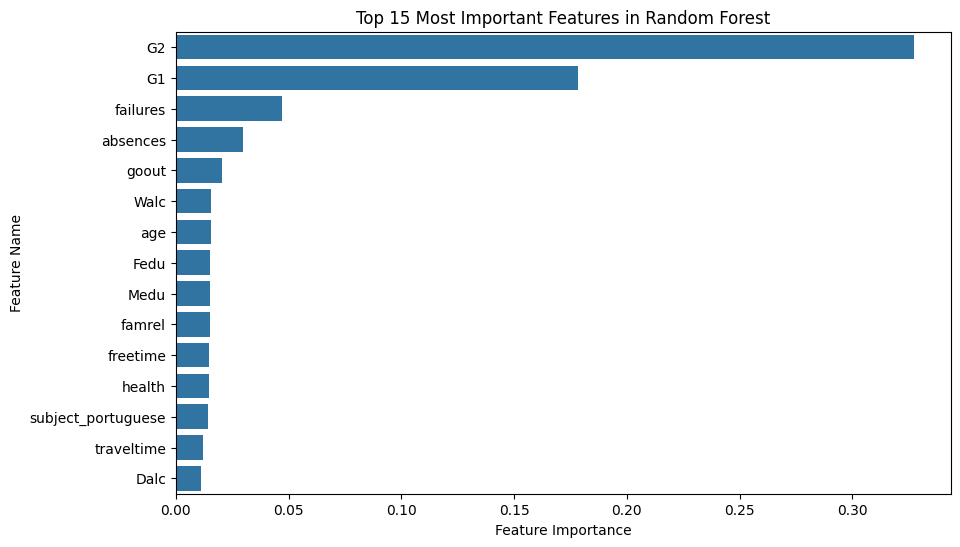


Top 15 Features:
1. G2 — 0.3273
2. G1 — 0.1782
3. failures — 0.0469
4. absences — 0.0297
5. goout — 0.0205
6. Walc — 0.0156
7. age — 0.0154
8. Fedu — 0.0153
9. Medu — 0.0152
10. famrel — 0.0151
11. freetime — 0.0148
12. health — 0.0147
13. subject_portuguese — 0.0144
14. traveltime — 0.0120
15. Dalc — 0.0114


In [ ]:
# -----------------------------------------
# RANDOM FOREST (Detailed Analysis)
# -----------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

print("\n=== RANDOM FOREST CLASSIFIER (Detailed Analysis) ===\n")

# -------------------------
# Prepare Target (Pass/Fail)
# -------------------------
y_bin = (y >= 10).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_processed, y_bin, test_size=0.2, random_state=42
)

# -------------------------
# Train Random Forest
# -------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1
)
rf.fit(X_train_bin, y_train_bin)

# -------------------------
# Predictions + Accuracy
# -------------------------
y_pred_rf = rf.predict(X_test_bin)
y_proba_rf = rf.predict_proba(X_test_bin)[:, 1]

print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_rf))

# -------------------------
# Confusion Matrix
# -------------------------
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test_bin, y_pred_rf),
    annot=True, fmt='d', cmap="Blues"
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Feature Importance
# -------------------------

# استرجاع أسماء الأعمدة الرقمية:
num_features = num_cols

# استرجاع أسماء أعمدة الـ OneHot Encoder:
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)

# دمج كل الأعمدة مع بعض:
feature_names = list(num_features) + list(cat_features)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:top_n],
    y=np.array(feature_names)[indices][:top_n]
)
plt.title("Top 15 Most Important Features in Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()

# Print Top Features
print("\nTop 15 Features:")
for i in range(top_n):
    print(f"{i+1}. {np.array(feature_names)[indices][i]} — {importances[indices][i]:.4f}")




--- Support Vector Machine Classifier ---
Accuracy: 0.9138755980861244

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        47
           1       0.91      0.98      0.95       162

    accuracy                           0.91       209
   macro avg       0.91      0.83      0.86       209
weighted avg       0.91      0.91      0.91       209



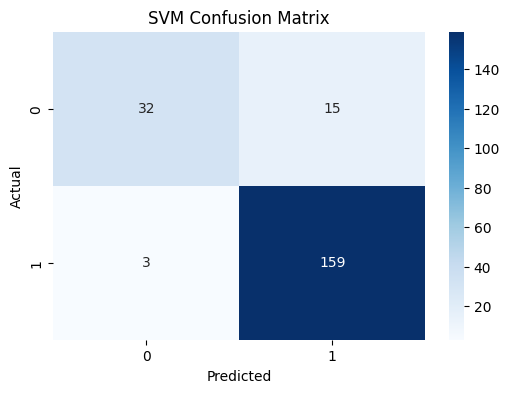

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# SVM Model (Styled like GitHub notebook)
# -----------------------------

print("\n--- Support Vector Machine Classifier ---")

# 1) Pipeline (Scaler + SVM)
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 2) Train the model
svm_clf.fit(X_train_bin, y_train_bin)

# 3) Predict
y_pred_svm = svm_clf.predict(X_test_bin)

# 4) Evaluation
print("Accuracy:", accuracy_score(y_test_bin, y_pred_svm))
print("\nClassification Report:\n")
print(classification_report(y_test_bin, y_pred_svm))

# 5) Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_svm),
            annot=True, fmt='d', cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()